# Improving Computer Vision Accuracy using Convolutions

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

# 利用卷积提高计算机视觉精度

在前几节课中，你看到了如何使用包含三层的深度神经网络（DNN）进行时Fashion MNIST图像识别--输入层（根据输入数据的形状）、输出层（根据类别数量）和一个隐藏层。你实验了不同大小的隐藏层、训练次数等对最终精度的影响。

为了方便起见，这里又提供了完整的代码。运行它，记下最后打印出来的测试精度。

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

: 

Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details. 

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

你的训练准确率大概是89%，测试准确率大概是87%......还不错......但是如何让它变得更好呢？一种方法是使用一种叫做Convolutions的方法。这里不打算纠结于卷积的细节，而想抓住它的核心思路，即通过卷积操作缩小了图像的内容，将模型注意力集中在图像特定的、明显的特征上。

如果你曾经使用滤镜进行过图像处理（比如：https://en.wikipedia.org/wiki/Kernel_(image_processing)），那么convolutions看起来会非常熟悉。

简而言之，如果取一个二维数组（通常是3x3或5x5）并将其应用到图像上。通过根据该矩阵内的公式改变底层像素，就可以进行图像边缘检测等工作。例如上面的链接，会看到一个3x3的矩阵，它是为边缘检测而定义的，其中间的单元格是8，而所有相邻单元格都是-1。在这种情况下，对于每个像素，把它的值乘以8，然后减去它周边像素的值（因为每个都乘了-1）。扫描整个图像，对每个像素都这样做，最终会得到一张边缘被增强的新图像。

这种计算对于计算机视觉来说是非常理想的，因为通常情况下，能够像这样被突出显示的特征才是区分一个物品和另一个物品的关键。卷积使得所需要的信息量会少很多......因为只需要对突出显示的特征进行训练。

这就是卷积神经网络的概念。在全连接层之前，增加一些层来做卷积，那么输入全连接层的信息就会更加集中，也可能更加准确。

运行下面的代码--这和前面的神经网络是一样的，但这次先加了卷积层。这会花费较长的时间，但看看对精度的影响。


In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4969 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3727 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3372 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3131 - accuracy: 0.8859
Epoch 5/5
313/313 [==============================] - 0s 897us/step - loss: 0.3591 - accuracy: 0.8744


In [16]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.1.0
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.1454 - accuracy: 0.9560
Epoch 2/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.0510 - accuracy: 0.9846
Epoch 3/10
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0316 - accuracy: 0.9899
Epoch 4/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0215 - accuracy: 0.9933
Epoch 5/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0146 - accuracy: 0.9954
Epoch 6/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.0104 - accuracy: 0.9965
Epoch 7/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0087 - accuracy: 0.9973
Epoch 8/10
60000/60000 [==============================] - 13s 225us/sample - loss: 0.0057 - accuracy: 0.9983
Epoch 9/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0060 - accurac

In [13]:
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [24]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.1.0
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)         

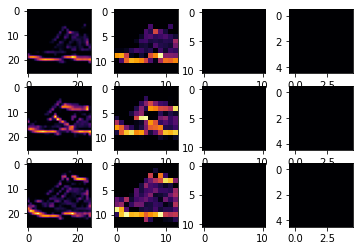

In [25]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    # 第0+1张图片
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x] # x代表第几层，能显示出来的就只有3层
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    # 第7+1张图片
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    # 第26+1张图片
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [3]:
pred = activation_model.predict(test_images[0].reshape(1,28,28,1))
len(pred)  # 7层

7

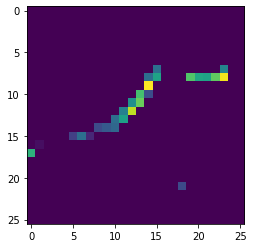

In [38]:
# 第一个卷积层
pred[0].shape  # (1, 26, 26, 64)  26*26像素*64个图片
# 取一个图片看看结果
plt.imshow(pred[0][0,:,:,1])  # 所有行所有列下表为1的过滤器

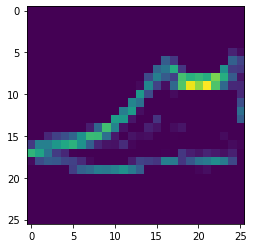

In [40]:
# 取一个图片看看结果
plt.imshow(pred[0][0,:,:,57])  # 所有行所有列下表为57的过滤器


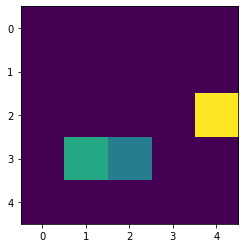

In [15]:
# 取一个图片看看结果
plt.imshow(pred[3][0,:,:,1])  # 所有行所有列下表为1的图片  # 第二层 maxpooling


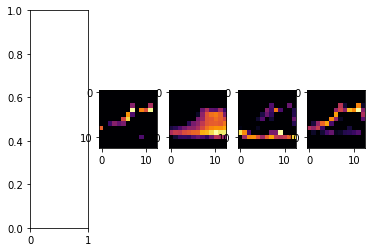

In [53]:
f2, axarr2 = plt.subplots(1,5)
for i in range(1,5):
    # plt.imshow(pred[1][0,:,:,1]) 
    # f1 = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))[1] # 选取第一层
    f4 = pred[1]
    img = f4[0, : , :, i]  # 不同的过滤器 第一个是靴子的斜面，第二个是靴子，第三个靴子底部
    # print(img.shape)
    axarr2[i].imshow(img, cmap='inferno')
    axarr2[i].grid(False)


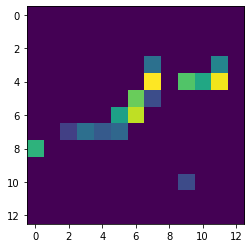

In [49]:
f4 = pred[1]
img = f4[0, : , :, i]
plt.imshow(img)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

练习

1. 尝试修改卷积层参数。将32改为16或64。这对准确度和/或训练时间有什么影响？

2. 删除最后的卷积层。这将对精度或训练时间产生什么影响？

3. 增加更多的卷积层会有什么影响？实验一下吧。

4. 除第一项外，删除所有的Convolutions。这样做会有什么影响？请完成实验。

5. 在上一节课中，实现了通过一个回调函数来检查模型的损失，并在损失减小到一定量时取消训练。看看是否能在这里实现？

In [17]:
import tensorflow as tf
# from tensorflow import keras

print(tf.__version__)
# 选择数据集
mnist = tf.keras.datasets.mnist
# 切分数据集
(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

print(training_images.shape)
# 这是因为第一次卷积期望一个包含所有数据的单一张量，所以要把训练数据设置为60000x28x28x1的一个4D列表，
# 测试图像也是如此处理。如果不这样做，会在训练时得到一个错误，因为卷积操作将不能识别数据形状。
training_images = training_images.reshape(60000, 28, 28,1)
# 训练集进行归一化处理
training_images = training_images/255.0

print(test_images.shape)
test_images = test_images.reshape(10000, 28, 28,1)
# 测试集进行归一化处理
test_images = test_images/255.0
# 定义模型
model = tf.keras.models.Sequential()
# 1、添加一个两维的卷积层 过滤器的数量为32，过滤器的大小为3*3 输入的数据的形状为28*28*1,
# 卷积之后每个图片的像素会小2即26*26，以为过滤器的大小为3*3 
# Param (3*3+1) * 32 = 320
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
# 2、加上一个maxpool层（池化层），用来压缩图像，同事保持卷所强调的特征内容，通过指定为（2,2），将图像的大小缩小为四分之一。
# 它的想法是创建一个2x2的像素数组，然后选取最大的一个，从而将4个像素变成1个，在整个图像中重复这样做，这样做的结果是将水平像素的数量减半，垂直像素的数量减半，有效地将图像缩小25%。
# 即26的一半/13 


model.add(tf.keras.layers.MaxPool2D(2,2))
# 3和4层，在来一次
# 第3层 调整参数Param (3*3*32+1)*64 = 18496个过滤器=
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

# 5层对输出进行扁平化处理
model.add(tf.keras.layers.Flatten())
# 5层的输出为5*5*64 = 1600

# 6层增加一个128个神经元的全连接层，
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# 该层的输出 (1600+1)*128 = 204928


# 7层增加一个10个神经元的输出层
model.add(tf.keras.layers.Dense(10,activation='softmax'))
# 输出为10个类型
model.summary()


2.1.0
(60000, 28, 28)
(10000, 28, 28)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense) 

In [22]:
# 现在开始编译模型，调用model.fit方法做训练，接着用测试集评估损失和准确率
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)
test_loss, test_acc=model.evaluate(test_images,test_labels)
print(test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 358us/sample - loss: 0.1240 - accuracy: 0.9626
Epoch 2/5
60000/60000 [==============================] - 18s 306us/sample - loss: 0.0410 - accuracy: 0.9873
Epoch 3/5
60000/60000 [==============================] - 18s 301us/sample - loss: 0.0275 - accuracy: 0.9913
Epoch 4/5
60000/60000 [==============================] - 18s 302us/sample - loss: 0.0187 - accuracy: 0.9938
Epoch 5/5
10000/10000 [==============================] - 2s 176us/sample - loss: 0.0310 - accuracy: 0.9909
0.9909
